In [460]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])

cust_filter = data['cust_id'] == 'klant_69'
data = data.where(cust_filter).dropna()


data['procesdag']=pd.to_datetime(data['procesdag'])
data.set_index('procesdag', inplace=True)
data = data['2016-09-01':'2016-10-01']

data.head()

,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
procesdag,,,,
2016-09-01,klant_69,702.0,470.0,train
2016-09-02,klant_69,470.0,0.0,train
2016-09-03,klant_69,0.0,933.0,train
2016-09-04,klant_69,933.0,468.0,train
2016-09-05,klant_69,468.0,504.0,train


In [461]:
data.head()

,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
procesdag,,,,
2016-09-01,klant_69,702.0,470.0,train
2016-09-02,klant_69,470.0,0.0,train
2016-09-03,klant_69,0.0,933.0,train
2016-09-04,klant_69,933.0,468.0,train
2016-09-05,klant_69,468.0,504.0,train


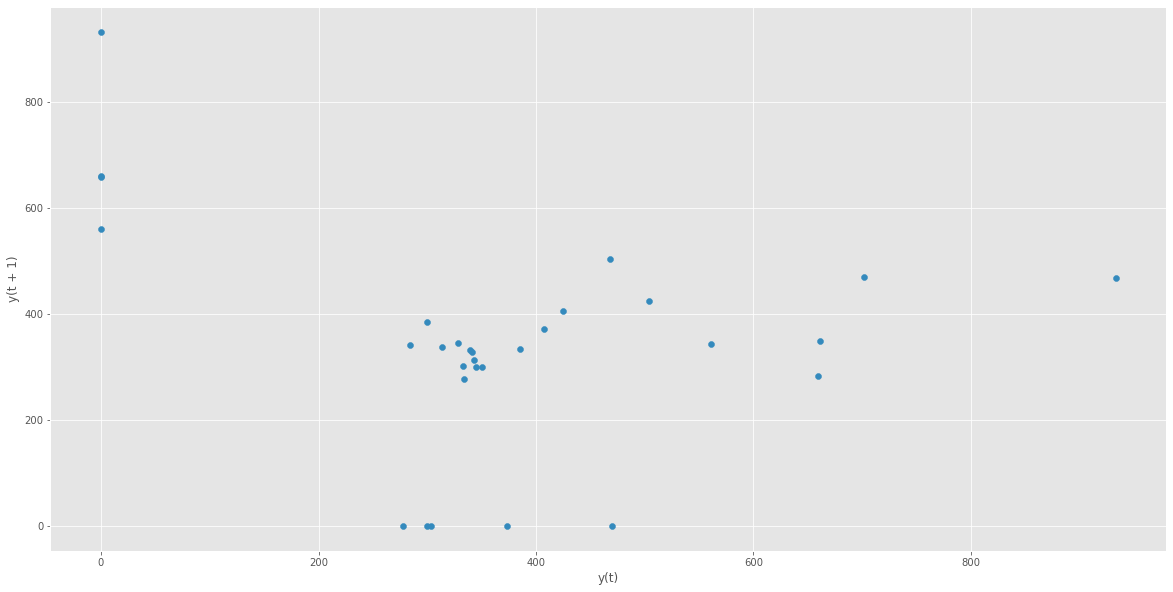

In [462]:
pd.plotting.lag_plot(data['aantal_pakketten'])

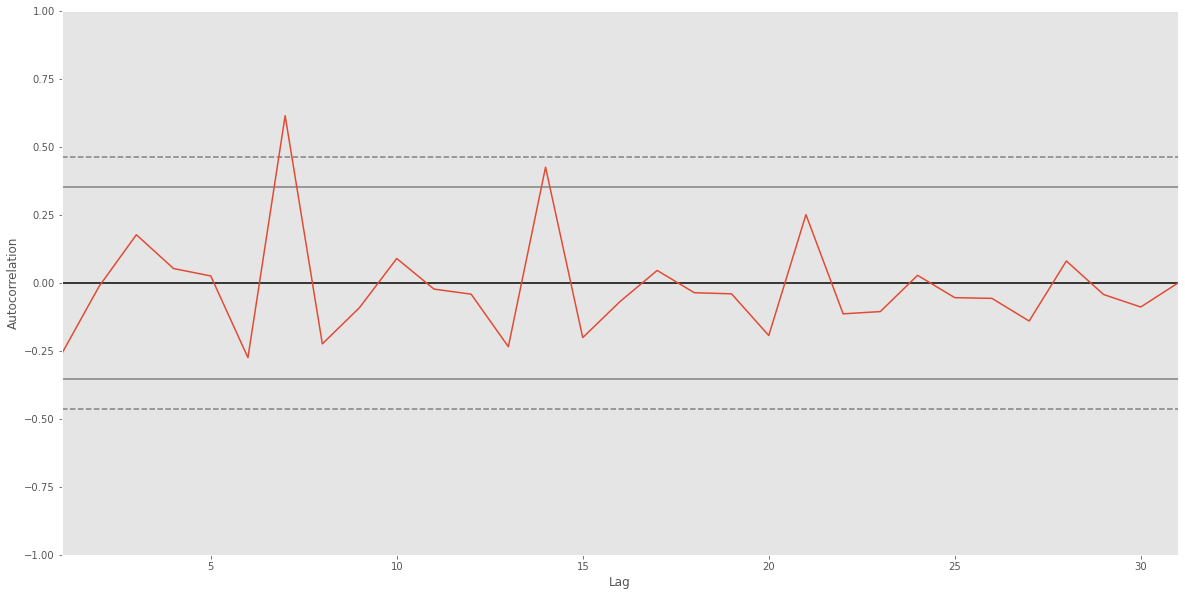

In [463]:
pd.plotting.autocorrelation_plot(data['aantal_pakketten'])

In [464]:
data['aantal_pakketten'].corr(data['aantal_pakketten'].shift(7))

0.9305395743633438

In [466]:
data['stationary'] = data['aantal_pakketten'].diff()
data['stationary']

procesdag
2016-09-01      NaN
2016-09-02   -232.0
2016-09-03   -470.0
2016-09-04    933.0
2016-09-05   -465.0
2016-09-06     36.0
2016-09-07    -79.0
2016-09-08    -18.0
2016-09-09    -34.0
2016-09-10   -373.0
2016-09-11    661.0
2016-09-12   -311.0
2016-09-13    -50.0
2016-09-14     85.0
2016-09-15    -51.0
2016-09-16    -56.0
2016-09-17   -278.0
2016-09-18    659.0
2016-09-19   -375.0
2016-09-20     57.0
2016-09-21    -13.0
2016-09-22     17.0
2016-09-23    -45.0
2016-09-24   -300.0
2016-09-25    561.0
2016-09-26   -218.0
2016-09-27    -29.0
2016-09-28     25.0
2016-09-29     -6.0
2016-09-30    -30.0
2016-10-01   -303.0
Name: stationary, dtype: float64

In [467]:
from statsmodels.tsa.ar_model import AR

# Train/Test datasets
X = data['stationary'].dropna()
train_data = X[:-7]
test_data = X[-7:]

In [468]:
data.shape

(31, 5)

In [469]:
train_data.shape

(23,)

In [470]:
test_data.shape

(7,)

In [471]:
train_data

procesdag
2016-09-02   -232.0
2016-09-03   -470.0
2016-09-04    933.0
2016-09-05   -465.0
2016-09-06     36.0
2016-09-07    -79.0
2016-09-08    -18.0
2016-09-09    -34.0
2016-09-10   -373.0
2016-09-11    661.0
2016-09-12   -311.0
2016-09-13    -50.0
2016-09-14     85.0
2016-09-15    -51.0
2016-09-16    -56.0
2016-09-17   -278.0
2016-09-18    659.0
2016-09-19   -375.0
2016-09-20     57.0
2016-09-21    -13.0
2016-09-22     17.0
2016-09-23    -45.0
2016-09-24   -300.0
Name: stationary, dtype: float64

In [472]:
test_data

procesdag
2016-09-25    561.0
2016-09-26   -218.0
2016-09-27    -29.0
2016-09-28     25.0
2016-09-29     -6.0
2016-09-30    -30.0
2016-10-01   -303.0
Name: stationary, dtype: float64

In [473]:
# Train AR model
model = AR(train_data)
model_fitted = model.fit()

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWa

In [474]:
print('The lag value chose is: %s' % model_fitted.k_ar)
print('The coefficients of the model are:\n %s' % model_fitted.params)

The lag value chose is: 8
The coefficients of the model are:
 const           -20.980399
L1.stationary    -0.981770
L2.stationary    -0.545614
L3.stationary    -0.395470
L4.stationary    -0.324460
L5.stationary    -0.372165
L6.stationary    -0.429834
L7.stationary     0.322253
L8.stationary     0.293909
dtype: float64


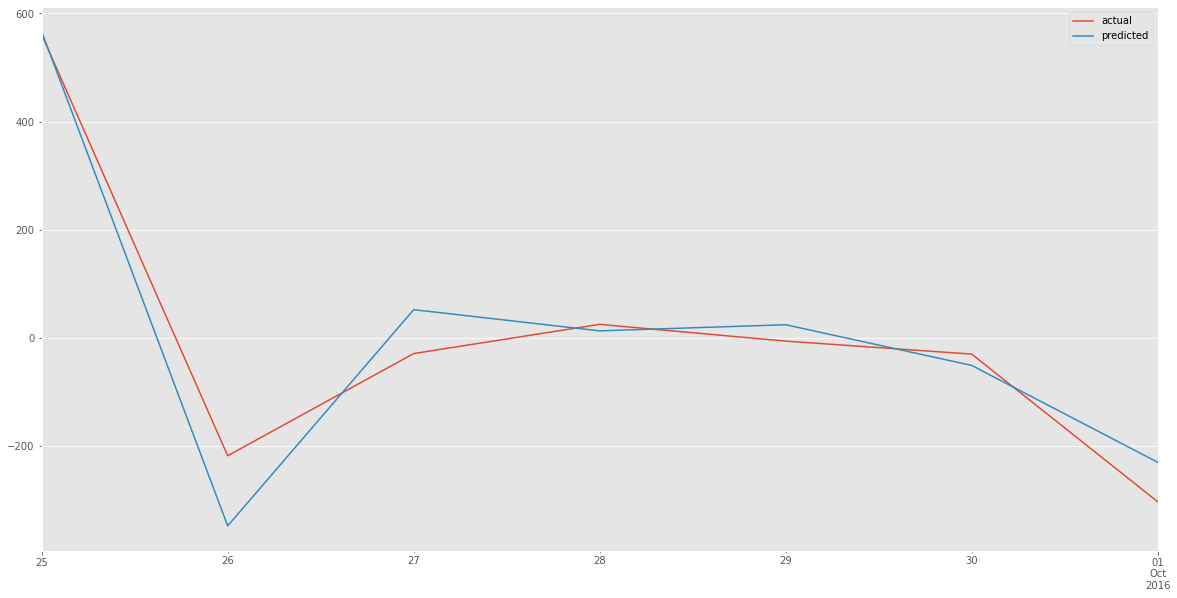

In [475]:
# make predictions
predictions = model_fitted.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data)-1,
    dynamic=False)

# create comparison dataframe
compare_data = pd.concat([data['stationary'].tail(7), predictions], axis=1).rename(columns={'stationary':'actual', 0:'predicted'})

compare_data.plot()

In [476]:
compare_data

,actual,predicted
2016-09-25,561.0,566.230463
2016-09-26,-218.0,-347.745034
2016-09-27,-29.0,52.137221
2016-09-28,25.0,12.981872
2016-09-29,-6.0,24.280938
2016-09-30,-30.0,-50.977420
2016-10-01,-303.0,-230.098828


In [477]:
diff = compare_data.actual - compare_data.predicted

Text(0, 0.5, '$\\hat{y}$')

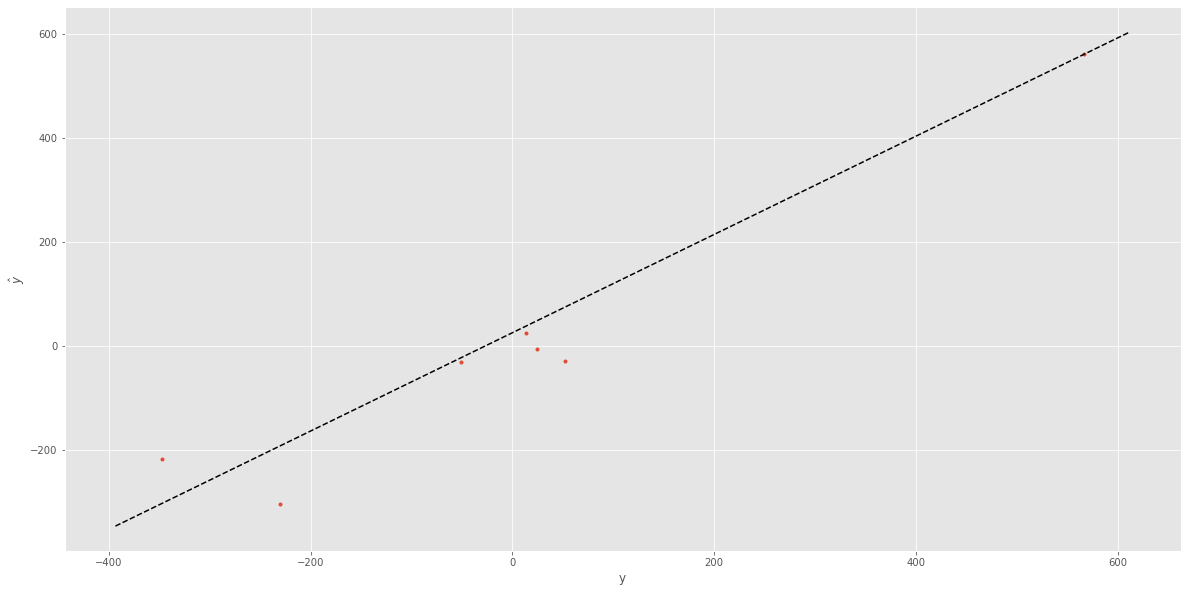

In [478]:
plt.plot(compare_data.predicted, compare_data.actual, ".")
plt.plot(plt.xlim(), plt.ylim(), ls="--", c='black')
plt.xlabel("y")
plt.ylabel("$\hat{y}$")

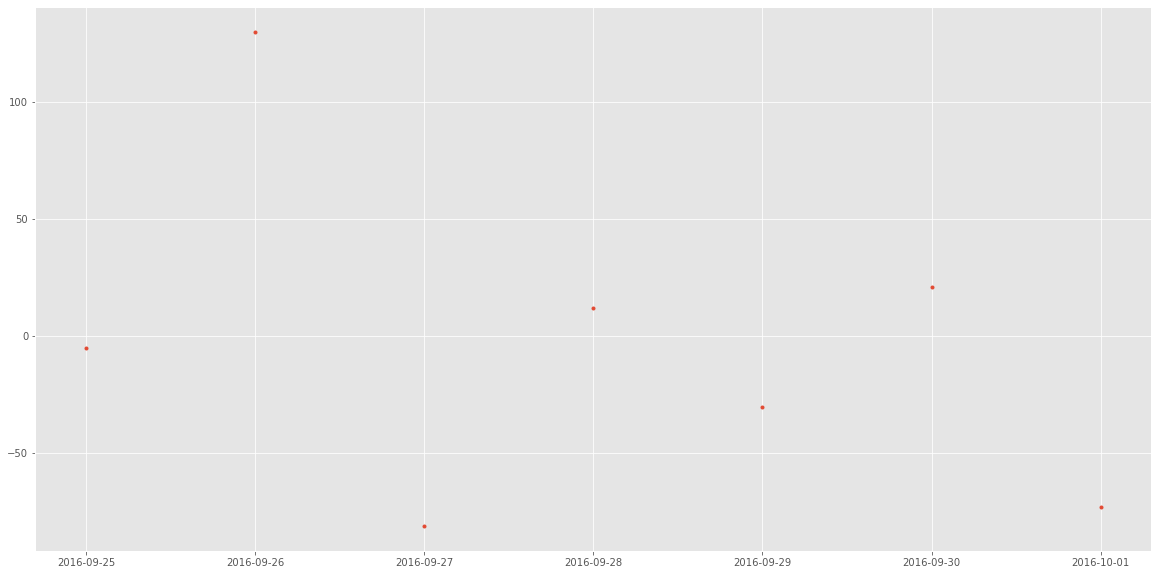

In [479]:
plt.plot(diff, ".")

(array([2., 0., 1., 1., 2., 0., 0., 0., 0., 1.]),
 array([-81.13722051, -60.04899502, -38.96076952, -17.87254402,
          3.21568147,  24.30390697,  45.39213246,  66.48035796,
         87.56858345, 108.65680895, 129.74503444]),
 <a list of 10 Patch objects>)

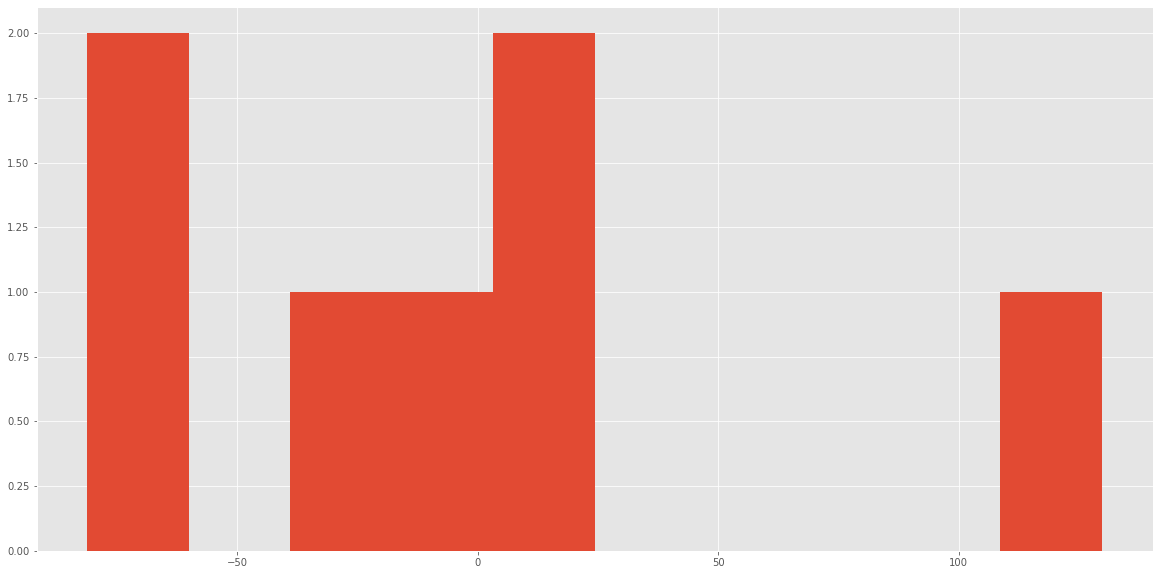

In [480]:
plt.hist(diff)